In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

## Regresión sobre precio de los juegos

La idea es encontrar una función, donde la salida sea el precio de los juegos, y las entradas los dueños promedio, rating neto y rating porcentual.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/SoraSpace769/CC5206_steam_games/GMatamoro/data/steam_ready2.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,appid,name,developer,publisher,price,year,duenos_promedio,rating_neto,rating_perc,Action,...,Casual,Simulation,Racing,Violent,Massively Multiplayer,Nudity,Sports,Early Access,Gore,Sexual Content
0,10,Counter-Strike,Valve,Valve,7801,2000,15000000.0,121195,0.973888,1,...,0,0,0,0,0,0,0,0,0,0
1,20,Team Fortress Classic,Valve,Valve,4329,1999,7500000.0,2685,0.839787,1,...,0,0,0,0,0,0,0,0,0,0
2,30,Day of Defeat,Valve,Valve,4329,2003,7500000.0,3018,0.895648,1,...,0,0,0,0,0,0,0,0,0,0
3,40,Deathmatch Classic,Valve,Valve,4329,2001,7500000.0,1006,0.826623,1,...,0,0,0,0,0,0,0,0,0,0
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,4329,1999,7500000.0,4962,0.947996,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Separación de features y labels
features = df[["price","rating_neto","rating_perc"]]
labels = df["duenos_promedio"].to_numpy()

In [4]:
# Normalización de conjuntos
X =(features-features.mean())/features.std()
y =(labels-labels.mean())/labels.std()
X.head()

,price,rating_neto,rating_perc
0,0.190166,7.522544,1.110130
1,-0.303575,0.118359,0.536096
2,-0.303575,0.139164,0.775212
3,-0.303575,0.013460,0.479746
4,-0.303575,0.260620,0.999294


### Regresión con Modelo Lineal (Mínimos Cuadrados)

Se intentará una regresión lineal simple sobre los datos.

In [19]:
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

# reg_linear = LinearRegression().fit(X, y)
# print(reg_linear.summary())
# print("Coeficientes:", reg_linear.coef_)
# print("R^2:", reg_linear.score(X,y))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     7052.
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:33:19   Log-Likelihood:                -30382.
No. Observations:               26913   AIC:                         6.077e+04
Df Residuals:                   26909   BIC:                         6.081e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.796e-16      0.005  -1.27e-13      

### Regresión con Random Forest

Se probará con distinta profundidad máxima, para observar el desempeño del algoritmo usando la métrica $R^2$.

In [7]:
depths_rf = np.arange(1, 40, step=1)
r2_scores_rf = np.zeros_like(depths_rf, dtype=np.float16)
for i in range(len(depths_rf)):

    regr_rf = RandomForestRegressor(max_depth=depths_rf[i], random_state=0)
    regr_rf.fit(X, y)
    #regr_rf.predict(X)
    r2_scores_rf[i] = regr_rf.score(X,y)

In [8]:
print("Máximo R^2:", max(r2_scores_rf))

Máximo R^2: 0.9404


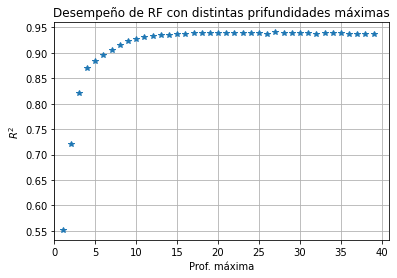

In [9]:
plt.plot(depths_rf, r2_scores_rf, "*")
plt.grid(True)
plt.title("Desempeño de RF con distintas prifundidades máximas")
plt.xlabel("Prof. máxima")
plt.ylabel("$R^2$")
plt.xlim(left=0)
plt.show()

### Regresión con KNN

Se probará con distinta cantidad de vecinos, y así observar el desempeño del algoritmo en base a la métrica $R^2$.

In [10]:
neigh_knn = np.arange(1, 21, step=1)
r2_scores_knn = np.zeros_like(neigh_knn, dtype=np.float16)
for i in range(len(neigh_knn)):

    regr_knn = KNeighborsRegressor(n_neighbors=neigh_knn[i])
    regr_knn.fit(X, y)
    #regr_knn.predict(X)
    r2_scores_knn[i] = regr_knn.score(X,y)

In [11]:
print("Máximo R^2:", max(r2_scores_knn))

Máximo R^2: 1.0


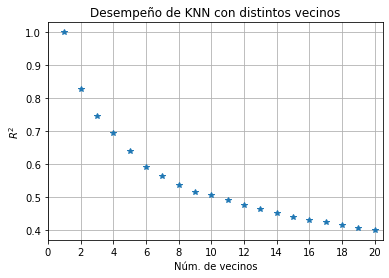

In [12]:
plt.plot(neigh_knn, r2_scores_knn, "*")
plt.grid(True)
plt.title("Desempeño de KNN con distintos vecinos")
plt.xlabel("Núm. de vecinos")
plt.ylabel("$R^2$")
plt.xlim(0,20.5)
plt.xticks(np.arange(0, max(neigh_knn)+1, 2.0))
plt.show()

## Regresión sobre tier de popularidad de los juegos

La idea es encontrar una función, donde la salida sean los clusters-tier de los juegos, y las entradas el precio, los dueños promedio, rating neto y rating porcentual.

In [14]:
dfT = pd.read_csv('https://raw.githubusercontent.com/SoraSpace769/CC5206_steam_games/GMatamoro/data/steam_target.csv')
dfT.drop(dfT.columns[0], axis=1, inplace=True)

In [30]:
def turn_over(x):
    if x>0:
        return int(13 - x)
    else:
        return int(0)
dfT["Target"] = dfT["Target"].apply(turn_over)
dfT.head()

,appid,name,developer,publisher,price,year,duenos_promedio,rating_neto,rating_perc,Action,...,Simulation,Racing,Violent,Massively Multiplayer,Nudity,Sports,Early Access,Gore,Sexual Content,Target
0,10,Counter-Strike,Valve,Valve,7801,2000,15000000.0,121195,0.973888,1,...,0,0,0,0,0,0,0,0,0,8
1,20,Team Fortress Classic,Valve,Valve,4329,1999,7500000.0,2685,0.839787,1,...,0,0,0,0,0,0,0,0,0,5
2,30,Day of Defeat,Valve,Valve,4329,2003,7500000.0,3018,0.895648,1,...,0,0,0,0,0,0,0,0,0,5
3,40,Deathmatch Classic,Valve,Valve,4329,2001,7500000.0,1006,0.826623,1,...,0,0,0,0,0,0,0,0,0,5
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,4329,1999,7500000.0,4962,0.947996,1,...,0,0,0,0,0,0,0,0,0,5


In [37]:
# Separación de features y labels
features = dfT[["price","duenos_promedio","rating_neto","rating_perc"]]
labels = dfT["Target"].to_numpy()

In [38]:
# Normalización de conjuntos
X =(features-features.mean())/features.std()
y =(labels-labels.mean())/labels.std()
X.head()

,price,duenos_promedio,rating_neto,rating_perc
0,0.190166,11.167003,7.522544,1.110130
1,-0.303575,5.533092,0.118359,0.536096
2,-0.303575,5.533092,0.139164,0.775212
3,-0.303575,5.533092,0.013460,0.479746
4,-0.303575,5.533092,0.260620,0.999294


### Regresión con Modelo Lineal (Mínimos Cuadrados)

Se intentará una regresión lineal simple sobre los datos.

In [40]:
reg_linear = LinearRegression().fit(X, y)
print("Coeficientes:", reg_linear.coef_)
print("R^2:", reg_linear.score(X,y))

Coeficientes: [0.18040871 0.51971292 0.13638491 0.01765739]
R^2: 0.42613639098369127


### Regresión con Random Forest

Se probará con distinta profundidad máxima, para observar el desempeño del algoritmo usando la métrica $R^2$.

In [41]:
depths_rf = np.arange(1, 40, step=1)
r2_scores_rf = np.zeros_like(depths_rf, dtype=np.float16)
for i in range(len(depths_rf)):

    regr_rf = RandomForestRegressor(max_depth=depths_rf[i], random_state=0)
    regr_rf.fit(X, y)
    #regr_rf.predict(X)
    r2_scores_rf[i] = regr_rf.score(X,y)

In [42]:
print("Máximo R^2:", max(r2_scores_rf))

Máximo R^2: 0.996


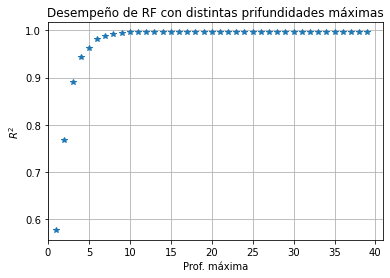

In [43]:
plt.plot(depths_rf, r2_scores_rf, "*")
plt.grid(True)
plt.title("Desempeño de RF con distintas prifundidades máximas")
plt.xlabel("Prof. máxima")
plt.ylabel("$R^2$")
plt.xlim(left=0)
plt.show()

### Regresión con KNN

Se probará con distinta cantidad de vecinos, y así observar el desempeño del algoritmo en base a la métrica $R^2$.

In [44]:
neigh_knn = np.arange(1, 21, step=1)
r2_scores_knn = np.zeros_like(neigh_knn, dtype=np.float16)
for i in range(len(neigh_knn)):

    regr_knn = KNeighborsRegressor(n_neighbors=neigh_knn[i])
    regr_knn.fit(X, y)
    #regr_knn.predict(X)
    r2_scores_knn[i] = regr_knn.score(X,y)

In [45]:
print("Máximo R^2:", max(r2_scores_knn))

Máximo R^2: 1.0


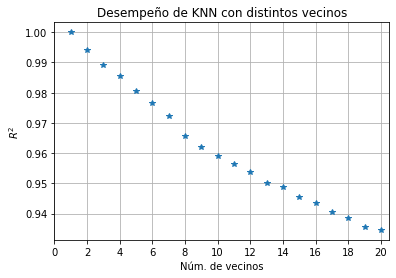

In [46]:
plt.plot(neigh_knn, r2_scores_knn, "*")
plt.grid(True)
plt.title("Desempeño de KNN con distintos vecinos")
plt.xlabel("Núm. de vecinos")
plt.ylabel("$R^2$")
plt.xlim(0,20.5)
plt.xticks(np.arange(0, max(neigh_knn)+1, 2.0))
plt.show()